In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score,classification_report
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt
import pandas as pd 
import pickle

In [2]:
with open('database/risco_credito.pkl','rb') as f:
    X_credito,y_credito = pickle.load(f)
y_credito

array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
       'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
      dtype=object)

In [3]:
tree_risco = DecisionTreeClassifier(criterion='entropy')
tree_risco.fit(X_credito,y_credito);
previsores = ['Historia de Credito','Dívida','Garantias','renda']
tree_risco.feature_importances_
tree_risco.classes_

array(['alto', 'baixo', 'moderado'], dtype=object)

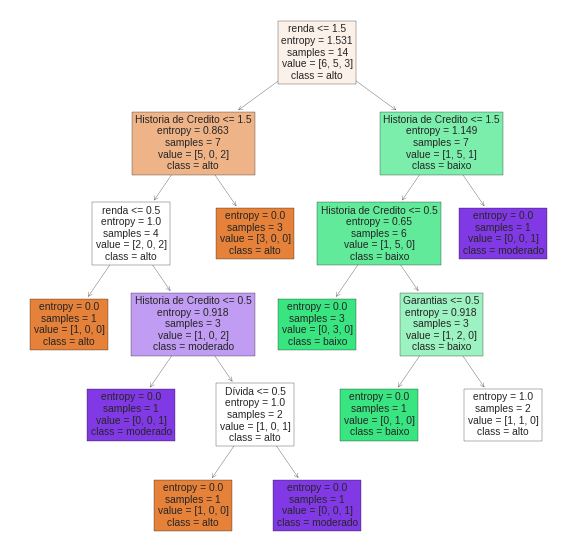

In [4]:
figura, eixos = plt.subplots(nrows=1,ncols=1,figsize=(10,10))
tree.plot_tree(tree_risco,feature_names=previsores,class_names=tree_risco.classes_,filled=True);

In [5]:
# historia boa (0), dívida alta (0),garantias nehuma (1),renda > 35 (2)
# historia ruim (2), dívida alta (0),garantias adequada (0),renda < 15 (0)
previsao = tree_risco.predict([[0,0,1,2],[2,0,0,0]])
previsao

array(['baixo', 'alto'], dtype=object)

# Base de Credito

In [6]:
with open('database/credit.pkl','rb') as f:
    Xtraining,Xtest, ytraining,yteste= pickle.load(f)

In [7]:
Xtraining.shape,ytraining.shape

((1500, 3), (1500,))

In [8]:
Xtest.shape,yteste.shape

((500, 3), (500,))

In [16]:
tree_credit = DecisionTreeClassifier(criterion='entropy',random_state=0)
tree_credit.fit(Xtraining,ytraining)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [17]:
previsoes =tree_credit.predict(Xtest)
previsoes

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [18]:
yteste

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [19]:
accuracy_score(yteste,previsoes)
# 0 pagam
# 1 não pagam
tree_credit.classes_

array([0, 1])

0.982

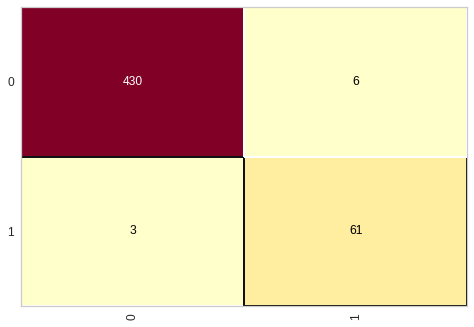

In [13]:
cm = ConfusionMatrix(tree_credit)
cm.fit(Xtraining,ytraining)
cm.score(Xtest,yteste)

In [14]:
print(classification_report(yteste,previsoes))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



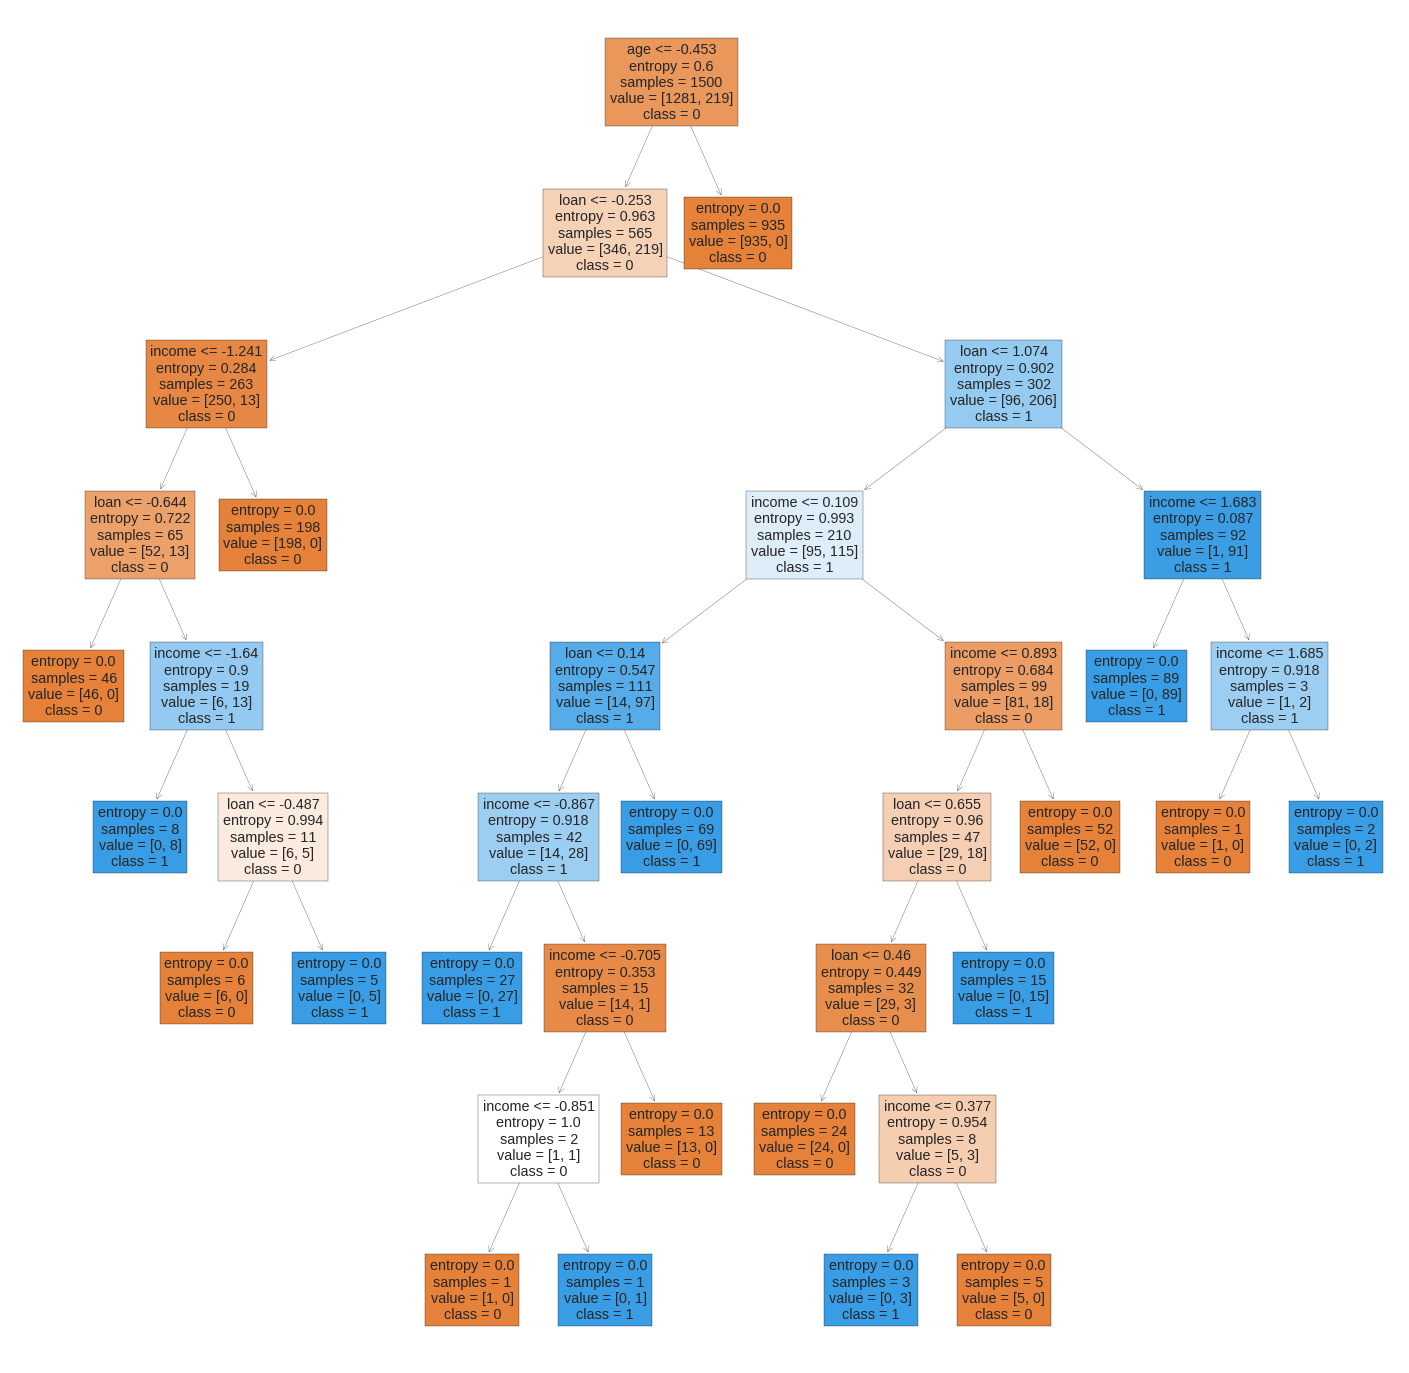

In [29]:
previsores = ['income','age','loan']
fig, axi = plt.subplots(nrows=1,ncols=1,figsize=(25,25))
tree.plot_tree(tree_credit,feature_names=previsores,class_names=['0','1'],filled=True);


In [25]:
fig.savefig('arvore_credit.png')